In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_excel('cleandata158.xlsx', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41365 entries, 0 to 50364
Data columns (total 56 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   41365 non-null  object 
 1   IDSTUD    41365 non-null  int64  
 2   ASBH02A   41365 non-null  object 
 3   ASBH02B   16131 non-null  object 
 4   ASBH03A   40775 non-null  object 
 5   ASBH04    26888 non-null  float64
 6   ASBH15A   23005 non-null  float64
 7   ASBH15B   20263 non-null  float64
 8   ASBH16    39885 non-null  float64
 9   ASBH17A   14850 non-null  float64
 10  ASBH17B   12612 non-null  float64
 11  ASBH18AA  25767 non-null  float64
 12  ASBH18AB  20840 non-null  float64
 13  ASBG01    29510 non-null  float64
 14  ASBG03    28438 non-null  float64
 15  ASBG10A   28638 non-null  float64
 16  ASBG10B   28451 non-null  float64
 17  ASBG10C   28329 non-null  float64
 18  ASBG10D   28259 non-null  float64
 19  ASBG10E   28291 non-null  float64
 20  ASBG10F   28349 non-null  fl

I am interested in understanding the extent of missing data in my data set and where this data is present. I am going to use heatmaps to get a better idea of this.

In [3]:
# Perform the Groupby Operation
grouped = df.groupby('Country')

In [4]:
country_sizes = grouped.size()
print(country_sizes)

Country
Austria        4476
Egypt          7354
France         4768
Germany        2515
Iran           5840
Jordan         5801
Netherlands    2026
Sweden         2989
Turkey         5596
dtype: int64


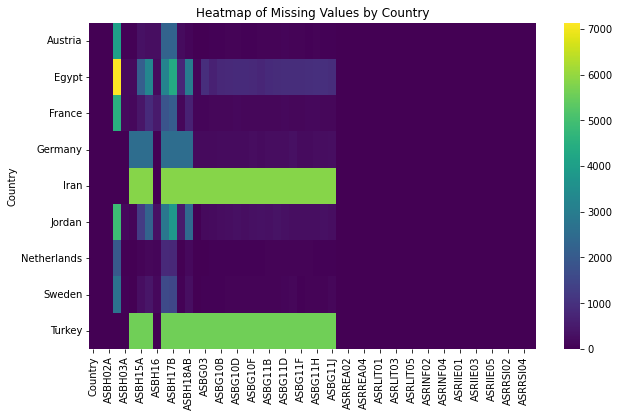

In [5]:
# Aggregate with isnull
missing_values = grouped.apply(lambda x: x.isnull().sum())

# Create the Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, annot=False, cmap='viridis', cbar=True)
plt.title('Heatmap of Missing Values by Country')
plt.show()

This is still quite difficult to read so I want to break it down even more and look at missing values for the columns that are not pertaining to assessment as these seem to not contain any missing values.

In [6]:
identifier_columns = ['Country', 'IDSTUD']
demographic_info_columns = ['ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03']
experience_in_school_columns = ['ASBG10A', 'ASBG10B','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F', 'ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']
assessment_score_columns = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']

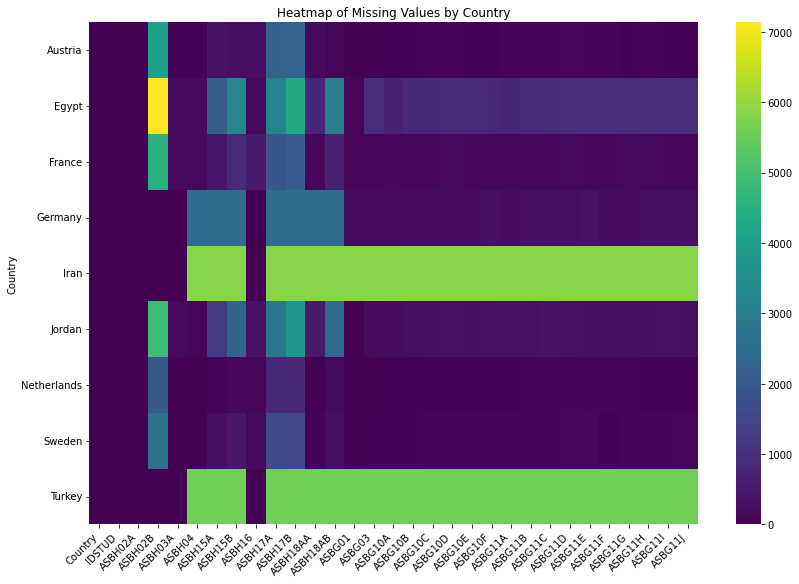

In [8]:
# Select the columns from the DataFrame
non_assessment_columns = identifier_columns + demographic_info_columns + experience_in_school_columns
df_selected = df[non_assessment_columns]

# Perform the Groupby Operation
grouped_selection = df_selected.groupby('Country')

# Aggregate with isnull
missing_values_selection = grouped_selection.apply(lambda x: x.isnull().sum())

# Create the Heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(missing_values_selection, annot=False, cmap='viridis', cbar=True)
# Rotate the column names
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to make room for labels
plt.title('Heatmap of Missing Values by Country')
plt.show()

There is a clear disparancy here between two groups of columns and I want to explore this in more detail. The first group of columns pertains to demographic information and the second group pertains to childrens' experience at school.

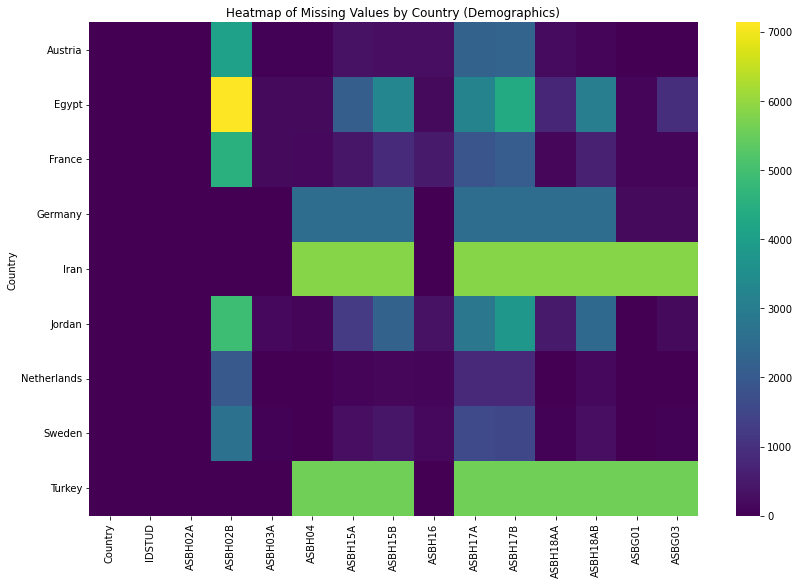

In [9]:
df_demographic = df[identifier_columns + demographic_info_columns]

# Perform the Groupby Operation
grouped_selection_demographic = df_demographic.groupby('Country')

# Aggregate with isnull
missing_values_demographic = grouped_selection_demographic.apply(lambda x: x.isnull().sum())

# Create the Heatmap
plt.figure(figsize=(12, 8))
demographicheatmap = sns.heatmap(missing_values_demographic, annot=False, cmap='viridis', cbar=True)

plt.tight_layout()  # Adjust layout to make room for labels
plt.title('Heatmap of Missing Values by Country (Demographics)')
plt.show()

**Egypt** is missing all of **ASBH02B** which is the age of the child when they came to the country and therefore the minimum age of arrival. It seems that **Turkey** and **Iran** are also missing quite a lot of demographic data pertaining to the level of education of parents and their jobs. Also **ASBG01** and **03** which is the sex and how often the language of the test is spoken at home. 

Now let's look at the experience in school columns in more detail.

In [ ]:
df_experience = df[experience_in_school_columns]

# Perform the Groupby Operation
grouped_selection_experience = df_experience.groupby('Country')

# Aggregate with isnull
missing_values_experience = grouped_selection_experience.apply(lambda x: x.isnull().sum())

# Create the Heatmap
plt.figure(figsize=(12, 8))
experienceheatmap = sns.heatmap(missing_values_experience, annot=False, cmap='viridis', cbar=True)

plt.tight_layout()  # Adjust layout to make room for labels
plt.title('Heatmap of Missing Values by Country (Experience Columns)')
plt.show()

So both **Iran** and **Turkey** are missing all data on experiences of children in school, which is a shame. However it would be nice to compare childrens experiences across the other countries. **I want a pivot table like the ones above but with the experiences columns instead of literacy scores, etc.**

I want to explore these gaps in the Iran and Turkey data a little more. However, first I am going to look at **Egypt** in more detail. The total number of rows for **Egypt** is 7354. This is helpful to see how many values are missing across the columns.

In [ ]:
missing_values_for_egypt = missing_values_demographic.loc['Egypt']
print(missing_values_for_egypt)

Now I want to explore if the child's immigrant status in each country plays a role in data being missing. Let's first start by understanding how many children are in each group for each country.

In [ ]:
# Apply value_counts() to the 'ASBH02A' column for each group
value_counts_per_group = grouped['ASBH02A'].apply(lambda x: x.value_counts(dropna=False))

print(value_counts_per_group)

Now let's created a pivot table to understand how country and immigrant status affect the number of missing values. 

In [ ]:
pivot_table_test = df_selected.pivot_table(
    index=['Country','ASBH02A'],
    aggfunc=lambda x: x.isnull().sum(),
)

In [ ]:
print(pivot_table_test)

In [ ]:
column_order= ['ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03','MINAGEARRIVAL', 'rounded_ages','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F', 'ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']

In [ ]:
pivot_table_test = pivot_table_test.reindex(column_order, axis=1)

In [ ]:
print(pivot_table_test)

In [ ]:
# Create the Heatmap
plt.figure(figsize=(12, 8))
heatmap_test = sns.heatmap(pivot_table_test, annot=False, cmap='viridis', cbar=True)
# Rotate the column names
heatmap_test.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to make room for labels
plt.title('Heatmap of Missing Values by Country and Immigration Status')
plt.show()

There does not seem to be more gaps in the data for those who are not born in the countries where they have taken the test (ASBH02A == No). So that's good. 

We need to be careful as I'm not sure if the heatmap is showing the colours as percentage of possible values or as total values (Some countries will have less possible values than others)

In [ ]:
# Calculate the total number of elements in each group
total_counts = df_selected.groupby(['Country','ASBH02A']).size()

# Calculate the percentage of missing values
percentage_missing = pivot_table_test.div(total_counts, axis=0) * 100

print("Pivot Table with Percentage of Missing Values:\n", percentage_missing)

In [ ]:
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(percentage_missing, annot=False, cmap='viridis', fmt='.2f')

plt.title('Percentage of Missing Values Heatmap')
plt.show()

So **Iran** and **Turkey** have no experience data and **Germany** is also missing quite a few columns.

In [ ]:
grouped["ASBH02B"].value_counts(dropna=False)

In [ ]:
double_grouped = df_selected.groupby(['Country','ASBH02A'])          

In [ ]:
double_grouped["ASBH02B"].value_counts(dropna=False)

I need to clean up the 6s in this column as they also represent NA, I believe.

In [ ]:
double_grouped["ASBH03A"].value_counts(dropna=False)

In [ ]:
double_grouped["ASBH04"].value_counts(dropna=False)

In [ ]:
double_grouped["ASBH15A"].value_counts(dropna=False)

In [ ]:
double_grouped["ASBH16"].value_counts(dropna=False)

"ASBH16" is hopes for child's level of education - most parents seem to have answered this.

Germany, Iran and Turkey have not answered any questions on how often lang of test spoken at home (4) parents' level of edu 15,  professions 17, level of language 18. Iran and Turkey have also not answered sex of child G01 or how often child says lang spoken at home G03.

## It would be interesting to compare child and parents' experience of lang of test spoken at home.

Where is age in all this??

You did well today, bravo!